## **Maximizing CNN Validation Performance - Political Meme Classification**

<br></br>
### **Introduction**

This project focuses on designing and optimizing a convolutional neural network (CNN) for the classification of political memes into conservative and liberal viewpoints, aiming to achieve the highest possible accuracy on a validation set. The process includes employing techniques like early stopping and model checkpointing to monitor performance, and making adjustments to the CNN architecture based on changes in accuracy related to hyperparameters such as filters and layers. The task emphasizes reproducibility through a pre-determined data split and involves the creation of separate data generators for training, validation, and testing. The project’s success will be ultimately evaluated on an independent test set, with learning curves and detailed analysis included in the final report.


<br></br>
### **Dataset Source**



For this project, the image dataset was sourced by exploring meme-focused pages on social platforms such as Reddit, Facebook, and Pinterest. A total of 1,000 images were collected, with an equal distribution between conservative and liberal political themes.

Special thanks to `Kate Arendes` for contributions to the collection process.

<br></br>
<h3><b> Loading Python Libraries </b></h3>

In [1]:
import PIL
import numpy as np
from PIL import Image
from keras import layers
from tensorflow import keras
from keras import regularizers
from google.colab import drive
import matplotlib.pyplot as plt
from keras.metrics import Precision
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score

<br></br>
### **Load the data: The Political Memes Classification Dataset**


- `First, lets download the images from google drive:`

In [2]:
# Let's mount the drive to load the images
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br></br>
### **Dataset Generation - Image Data Generator**

In [3]:
# Let's set the base directory for loading the political meme images
base_directory = "/content/drive/My Drive/Political Meme Dataset/"

# Let's initialize the ImageDataGenerator with rescaling to normalize pixel values
my_generator = ImageDataGenerator(rescale=1./255)

# Let's set up the training data generator
# This loads images of size 150x150, in batches of 4, with binary class labels
train_generator = my_generator.flow_from_directory(
    f"{base_directory}/training/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the validation data generator
# Loads images of the same size and batch size as the training generator
valid_generator = my_generator.flow_from_directory(
    f"{base_directory}/validation/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the test data generator
# Uses the same parameters for consistency across training, validation, and testing
test_generator = my_generator.flow_from_directory(
    f"{base_directory}/test/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


<br></br>
### **Data Visualization**

In [4]:
# Let's load a single image using PIL library.
image = Image.open(f"{base_directory}/training/train_liberal/0f76446d7d65a9e6508a226ae33e8a51--felder-donald-oconnor.jpg")

# Let's get some details about the image.
print("Image Mode   -->", image.mode)
print("Image Format --> ", image.format)
print("Image Size   -->", image.size)

Image Mode   --> RGB
Image Format -->  JPEG
Image Size   --> (118, 108)


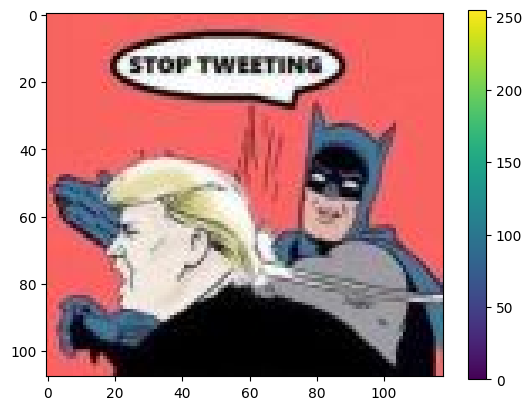

In [5]:
# Let's display the colored image
plt.imshow(np.asarray(image))
plt.colorbar()

<br></br>

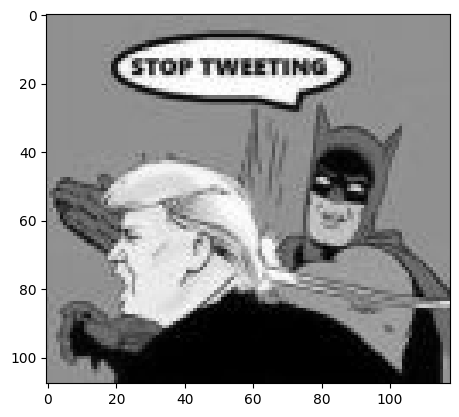

In [6]:
# Let's convert the input image to grayscale
gs_image = image.convert(mode='L')

# Let's display the grayscale image using matplotlib
plt.imshow(np.asarray(gs_image), cmap='gray')

(200, 200)


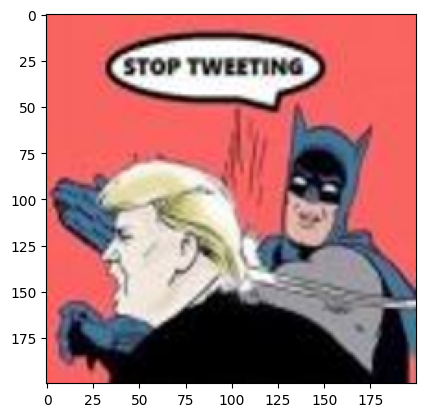

In [7]:
# Let's resize the image to 200x200 pixels
img_resized = image.resize((200,200))

# Let's print the size of the resized image to verify the new dimensions
print(img_resized.size)

# Let's display the resized image using matplotlib
plt.imshow(np.asarray(img_resized))

<br></br>
#### **Train Images - Data Visualization**

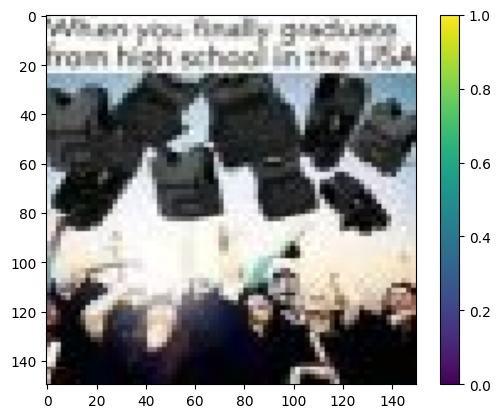

1.0


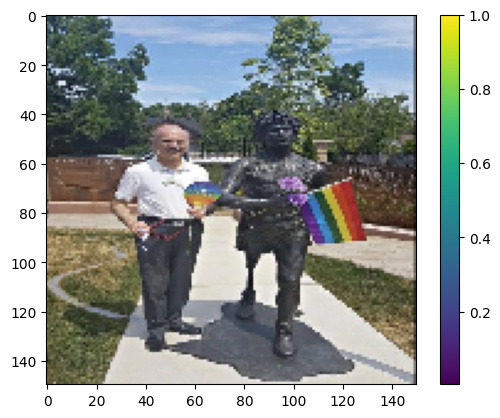

0.0


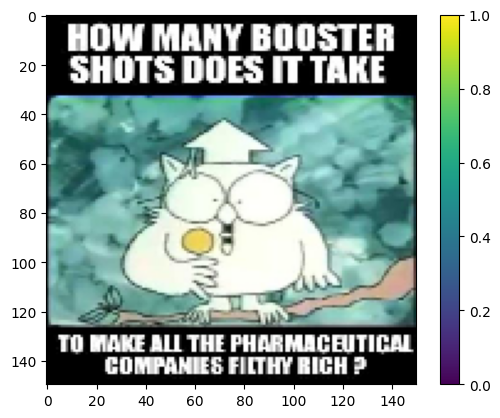

0.0


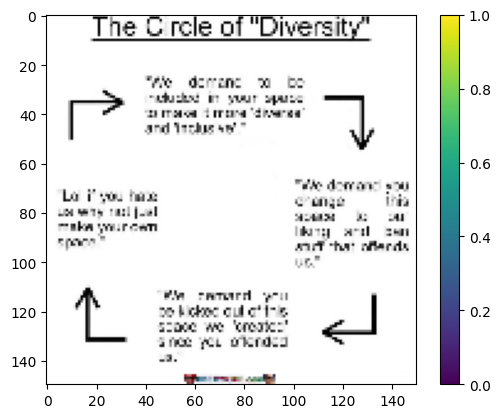

0.0


In [8]:
# Let's loop through batches of images from the train generator
for my_batch in train_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
#### **Validation Images - Data Visualization**

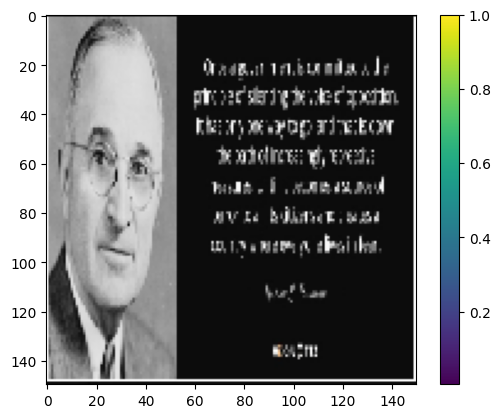

0.0


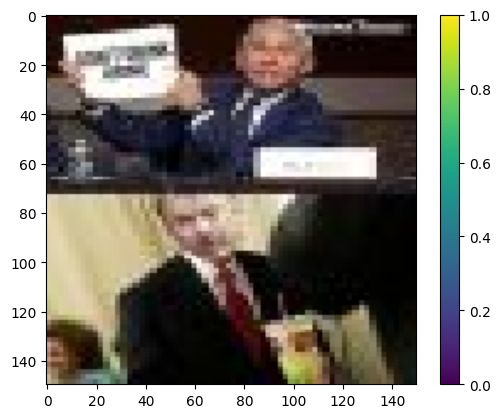

1.0


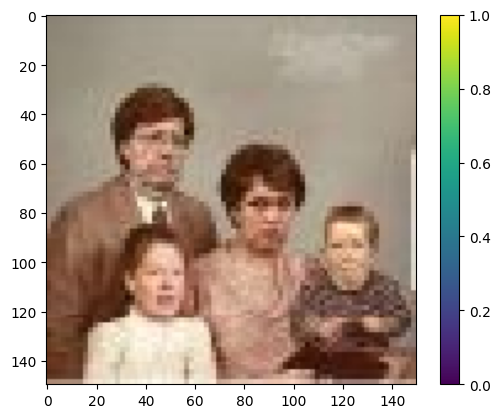

1.0


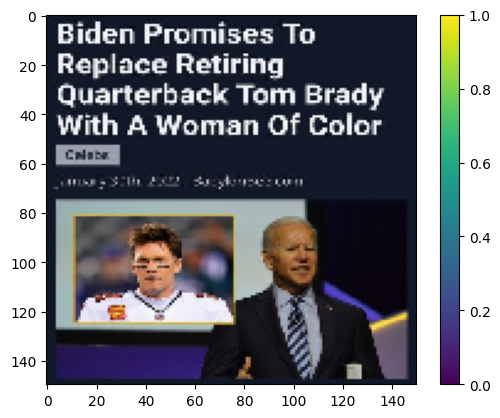

0.0


In [9]:
# Let's loop through batches of images from the validation generator
for my_batch in valid_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
#### **Test Images - Data Visualization**

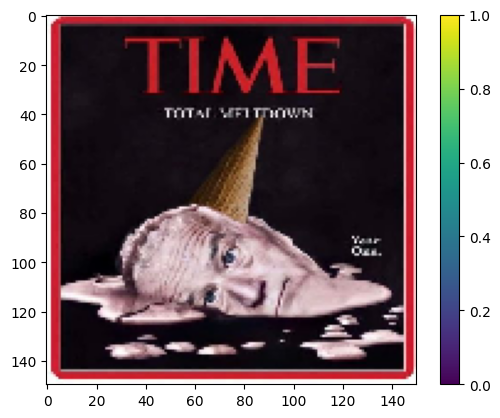

0.0


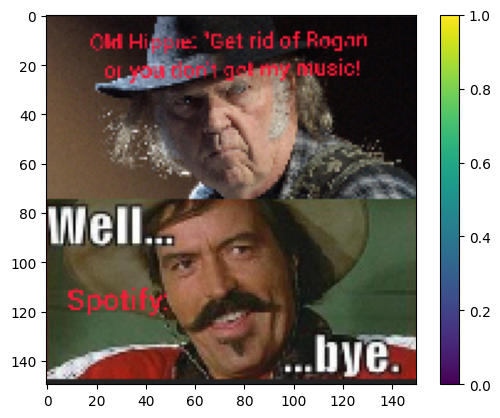

0.0


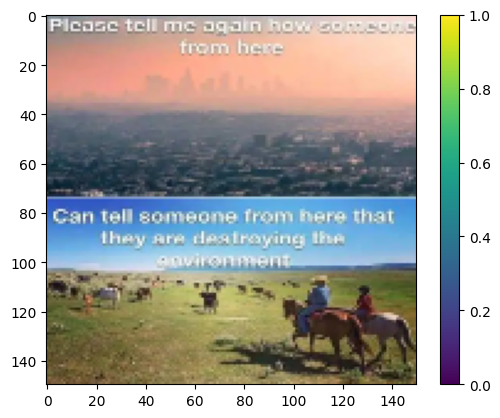

0.0


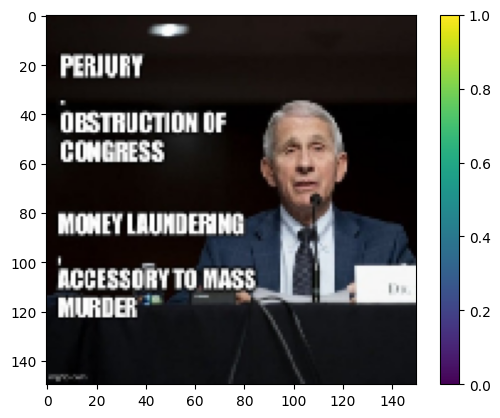

0.0


In [10]:
# Let's loop through batches of images from the test generator
for my_batch in test_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
### **Model Building**

In [73]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 37, 37, 128)       7385

In [17]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

In [18]:
# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

In [19]:
# Let's train and validate model on the training and validation data

history = model.fit(train_generator, validation_data = valid_generator, epochs = 10, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/10
150/150 [==============================] - 7s 36ms/step - loss: 0.6890 - accuracy: 0.5767 - precision_1: 0.5821 - val_loss: 0.6557 - val_accuracy: 0.6200 - val_precision_1: 0.5682
Epoch 2/10
150/150 [==============================] - 5s 32ms/step - loss: 0.5482 - accuracy: 0.7567 - precision_1: 0.7188 - val_loss: 0.3334 - val_accuracy: 0.9400 - val_precision_1: 0.8929
Epoch 3/10
150/150 [==============================] - 5s 32ms/step - loss: 0.4263 - accuracy: 0.8567 - precision_1: 0.8242 - val_loss: 0.2132 - val_accuracy: 0.9450 - val_precision_1: 0.9159
Epoch 4/10
150/150 [==============================] - 5s 32ms/step - loss: 0.3202 - accuracy: 0.8750 - precision_1: 0.8462 - val_loss: 0.2123 - val_accuracy: 0.9050 - val_precision_1: 0.9551
Epoch 5/10
150/150 [==============================] - 5s 33ms/step - loss: 0.2947 - accuracy: 0.8983 - precision_1: 0.8842 - val_loss: 0.1506 - val_accuracy: 0.9550 - val_precision_1: 0.9417
Epoch 6/10
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

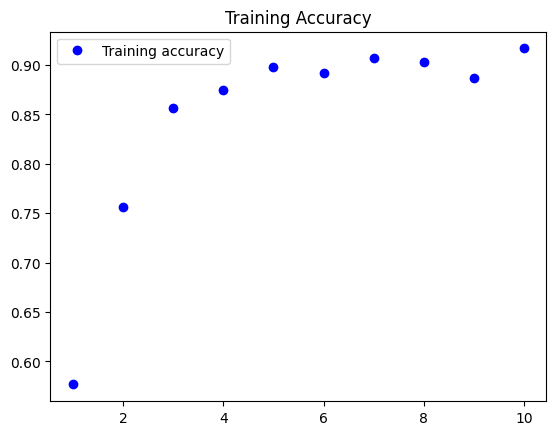

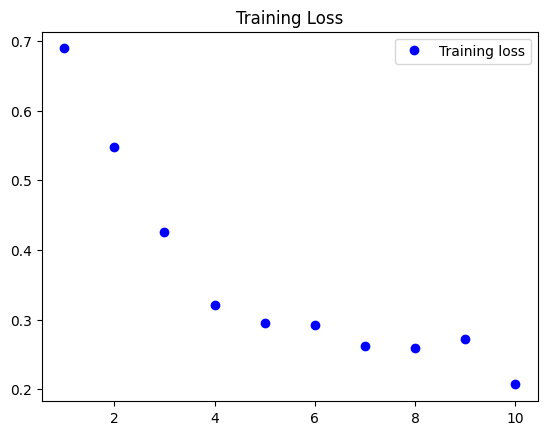

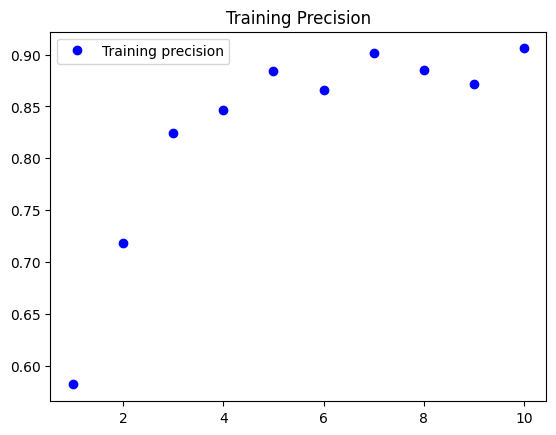

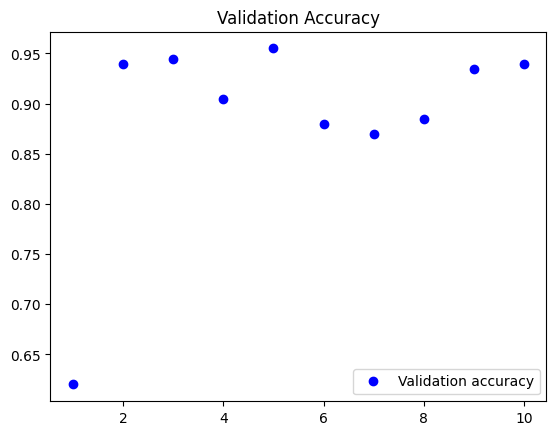

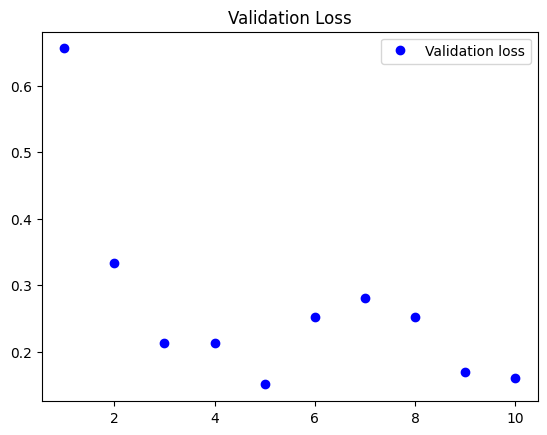

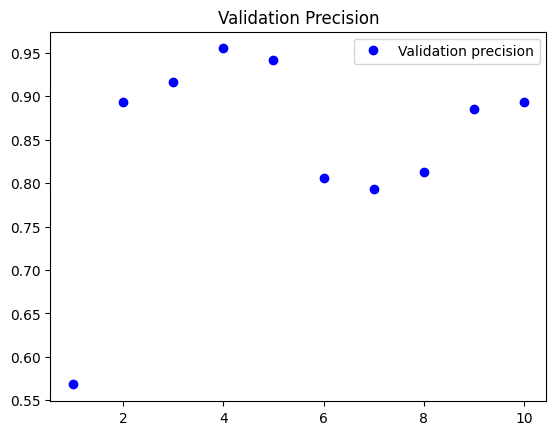

In [20]:
train_accuracy = history.history["accuracy"]
train_loss = history.history["loss"]
train_precision = history.history["precision_1"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
val_precision = history.history["val_precision_1"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [21]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 73s 1s/step - loss: 0.2016 - accuracy: 0.9500 - precision_1: 0.9245


[0.20159845054149628, 0.949999988079071, 0.9245283007621765]

<br></br>

**The initial model architecture resulted in a training accuracy of 0.9167 and a validation accuracy of 0.94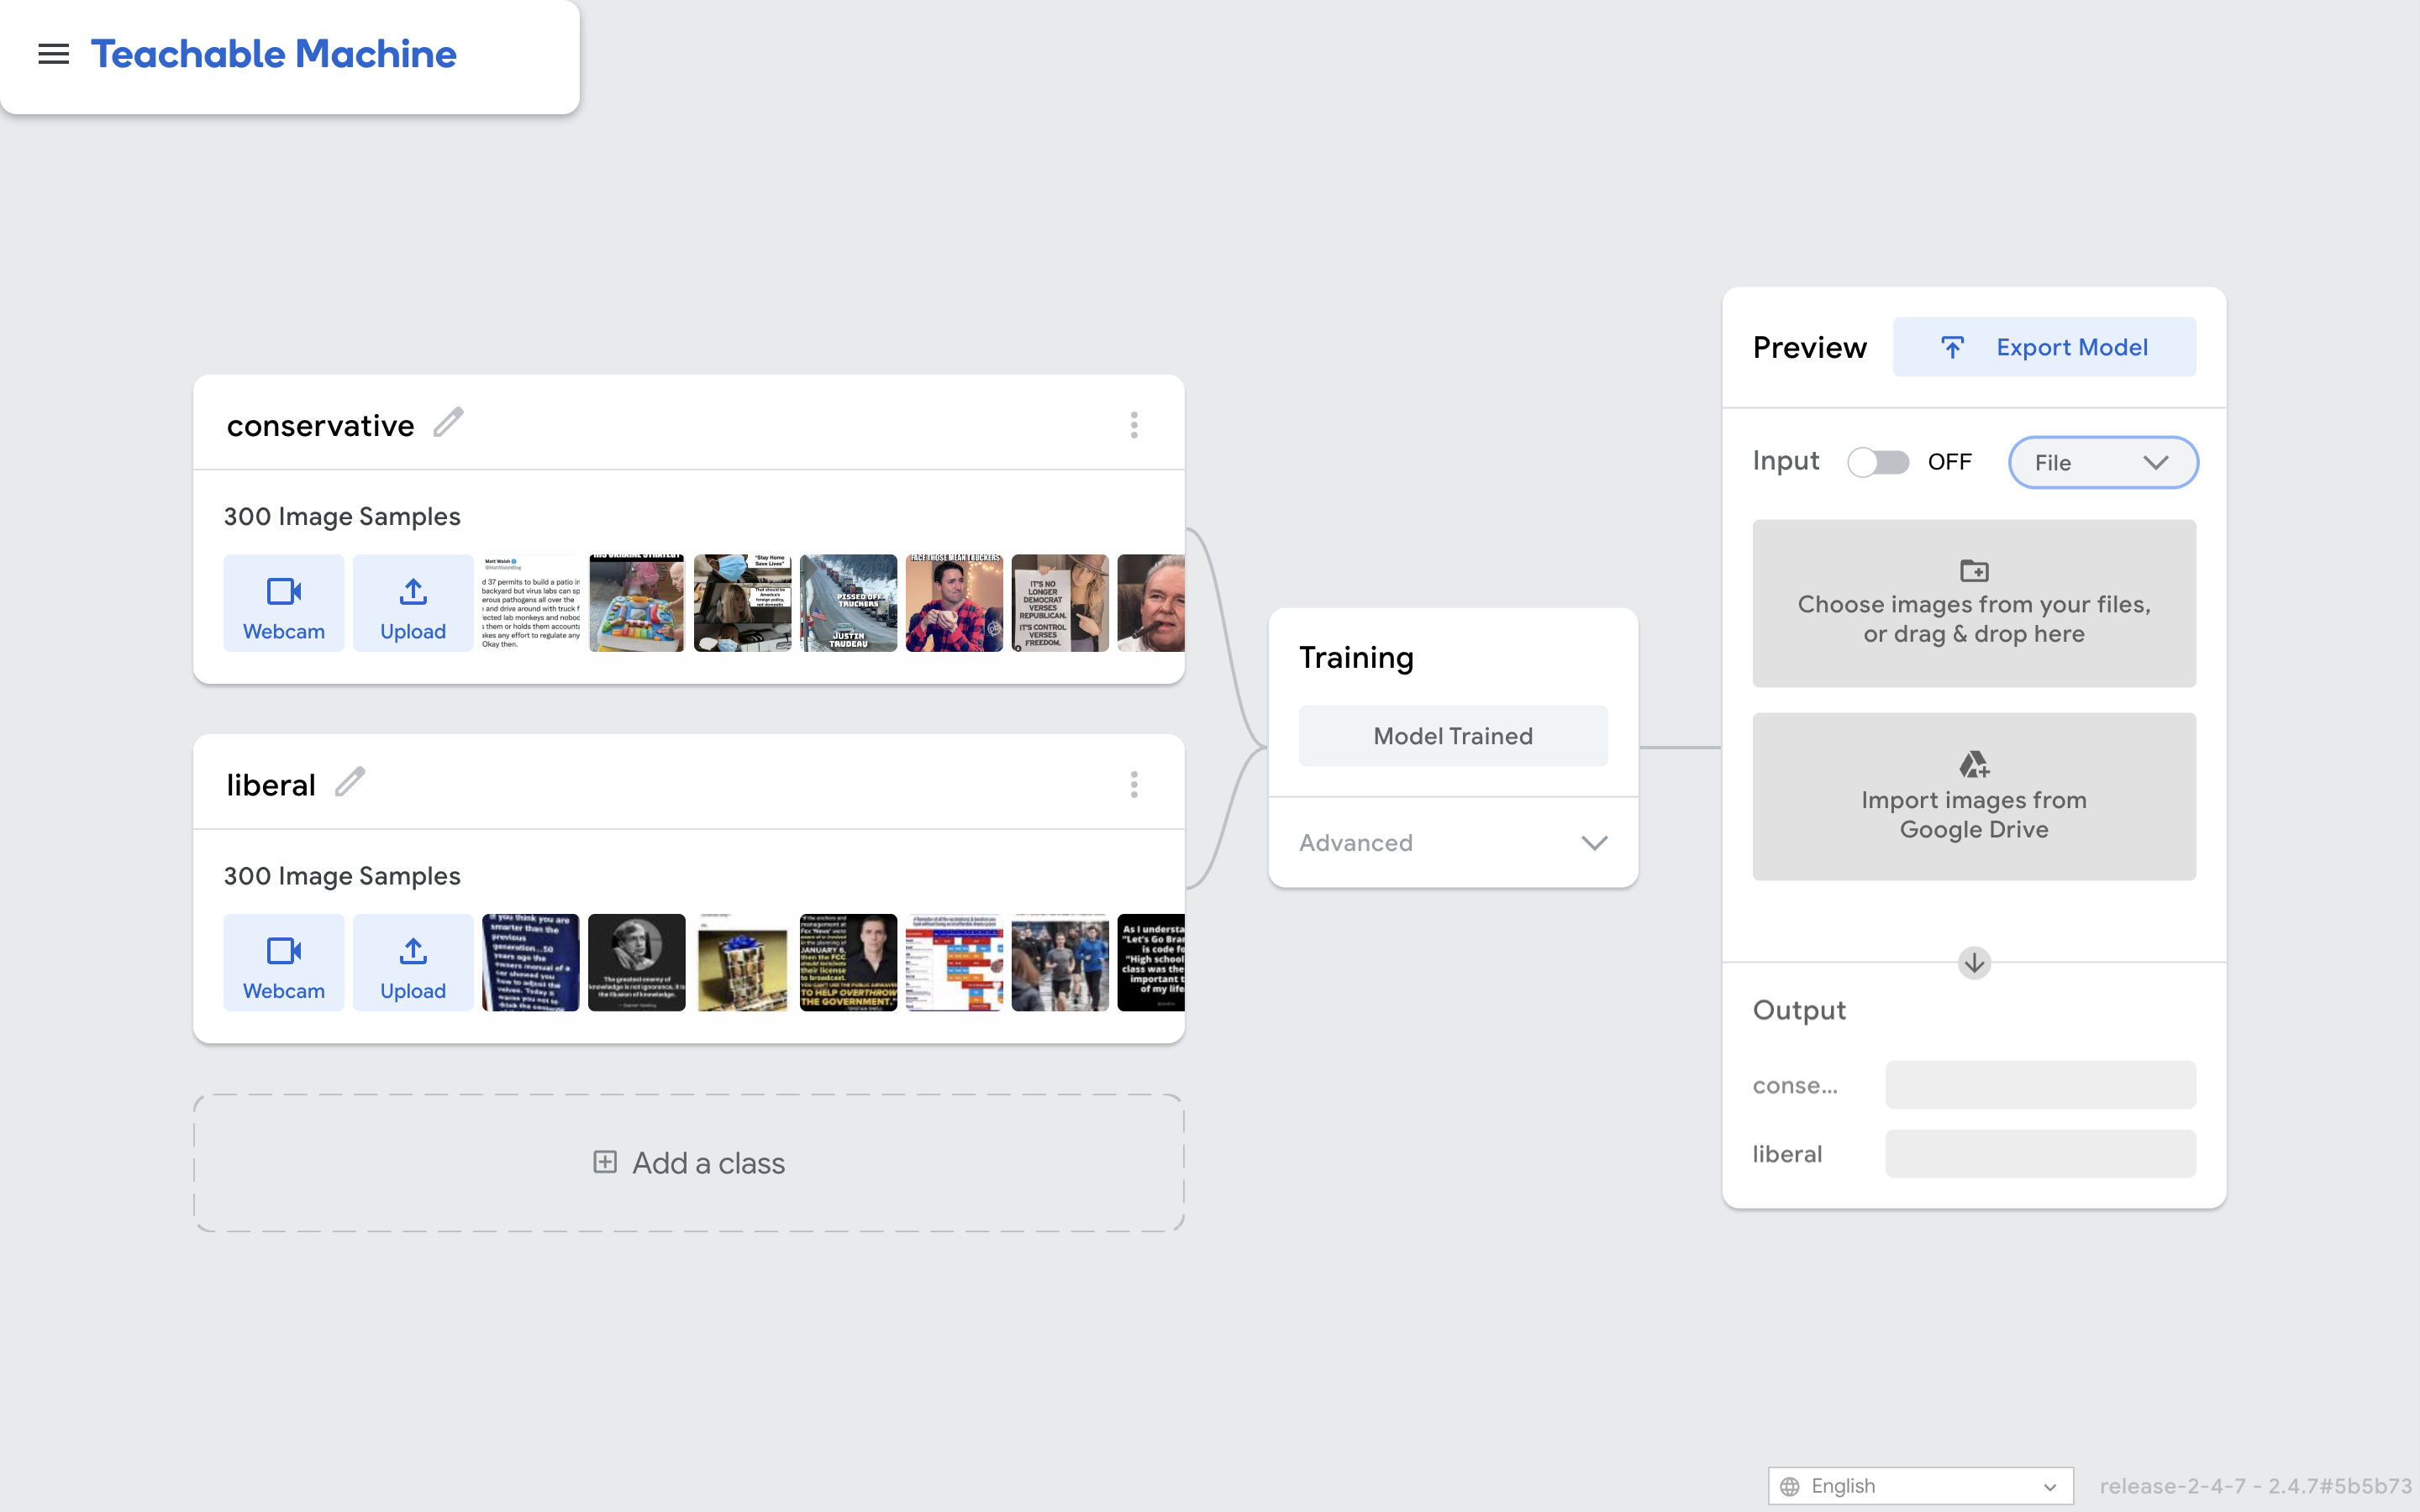 after being trained for 10 epochs. The next steps include increasing the number of epochs to 50 to observe how the training and validation accuracies change across different epochs. This extended training period will help determine if the model is benefiting from more training time or if it begins to overfit the training data. Observing the trend in validation accuracy will also indicate whether the model generalizes well to unseen data. Additional measures, such as implementing early stopping or adjusting the learning rate, may be considered based on the outcomes observed at different epochs.**

<br></br>
### **Let's Increase the Epochs**

In [22]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_increase_epochs = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_increase_epochs.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="base_model_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_increase_epochs = model_increase_epochs.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 34ms/step - loss: 0.6025 - accuracy: 0.6800 - precision_2: 0.7673 - val_loss: 0.2778 - val_accuracy: 0.9400 - val_precision_2: 0.9314
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4617 - accuracy: 0.8133 - precision_2: 0.7749 - val_loss: 0.2888 - val_accuracy: 0.9550 - val_precision_2: 0.9333
Epoch 3/30
150/150 [==============================] - 5s 32ms/step - loss: 0.4052 - accuracy: 0.8600 - precision_2: 0.8396 - val_loss: 0.1892 - val_accuracy: 0.9550 - val_precision_2: 0.9417
Epoch 4/30
150/150 [==============================] - 5s 34ms/step - loss: 0.3427 - accuracy: 0.8683 - precision_2: 0.8421 - val_loss: 0.1826 - val_accuracy: 0.9400 - val_precision_2: 0.8929
Epoch 5/30
150/150 [==============================] - 4s 25ms/step - loss: 0.2917 - accuracy: 0.8833 - precision_2: 0.8571 - val_loss: 0.3593 - val_accuracy: 0.8400 - val_precision_2: 0.9722
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - 30 epochs**

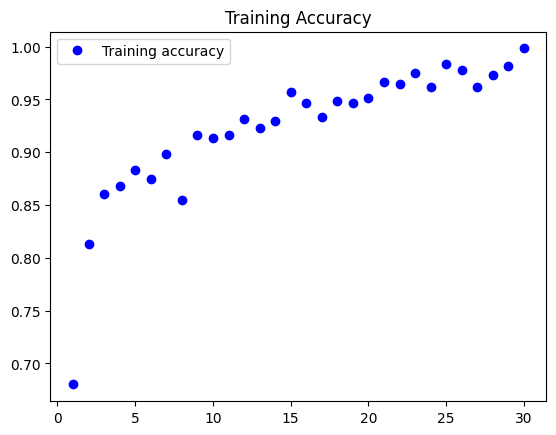

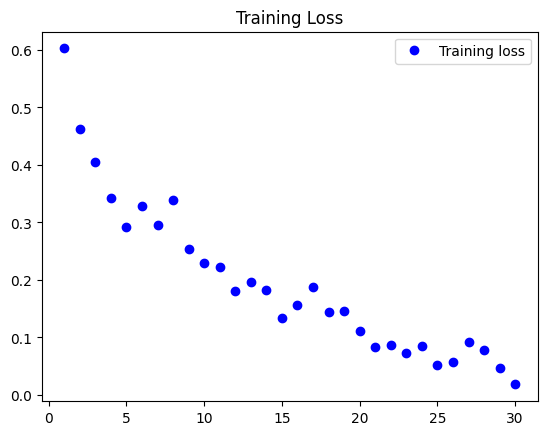

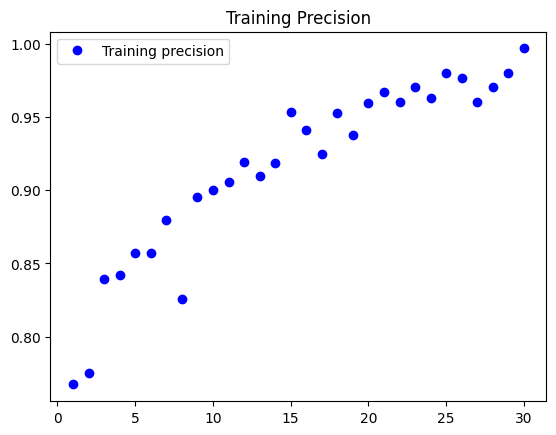

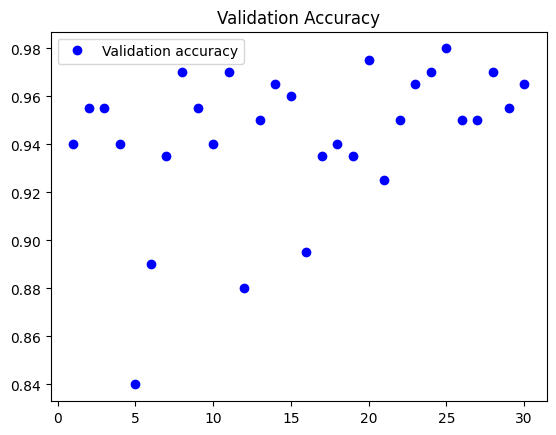

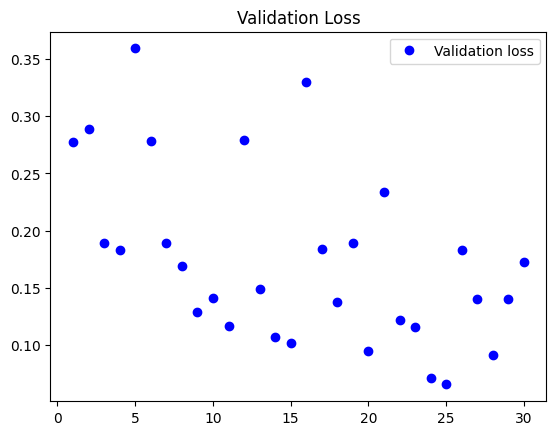

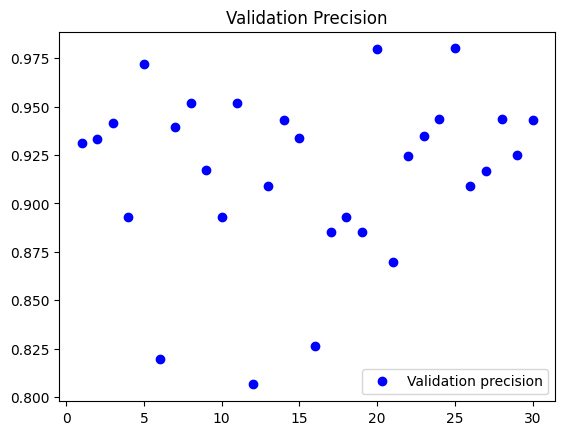

In [24]:
train_accuracy = history_increase_epochs.history["accuracy"]
train_loss = history_increase_epochs.history["loss"]
train_precision = history_increase_epochs.history["precision_2"]
val_accuracy = history_increase_epochs.history["val_accuracy"]
val_loss = history_increase_epochs.history["val_loss"]
val_precision = history_increase_epochs.history["val_precision_2"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [25]:
# Let's loads the best-performing model and evaluate on the test data

best_model = keras.models.load_model("base_model_checkpoint_filepath")
best_model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1484 - accuracy: 0.9550 - precision_2: 0.9333


[0.14840058982372284, 0.9549999833106995, 0.9333333373069763]

<br></br>

**Increasing the number of epochs from 10 to 30 resulted in an increase in training accuracy from 0.9169 to 0.9983. Similarly, the validation accuracy increased from 0.94 to 0.97. As expected, the time required for training increased significantly from 3 minutes to 5 minutes due to the higher number of epochs. This indicates that the model benefited from additional training, as evidenced by the improvements in both training and validation accuracies.**

<br></br>
### **Decrease the number of layers**

In [36]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_decrease_layers = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_decrease_layers.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="decrease_layers_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_decrease_layers = model_decrease_layers.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 36ms/step - loss: 0.6384 - accuracy: 0.6117 - precision_6: 0.6683 - val_loss: 0.3889 - val_accuracy: 0.8500 - val_precision_6: 0.9268
Epoch 2/30
150/150 [==============================] - 5s 31ms/step - loss: 0.5383 - accuracy: 0.8133 - precision_6: 0.7848 - val_loss: 0.2210 - val_accuracy: 0.9300 - val_precision_6: 0.9216
Epoch 3/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4117 - accuracy: 0.8483 - precision_6: 0.8047 - val_loss: 0.3755 - val_accuracy: 0.8250 - val_precision_6: 0.7407
Epoch 4/30
150/150 [==============================] - 5s 31ms/step - loss: 0.3692 - accuracy: 0.8600 - precision_6: 0.8214 - val_loss: 0.1845 - val_accuracy: 0.9300 - val_precision_6: 0.9574
Epoch 5/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3661 - accuracy: 0.8850 - precision_6: 0.8468 - val_loss: 0.1889 - val_accuracy: 0.9600 - val_precision_6: 0.9423
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decrease convolution layers**

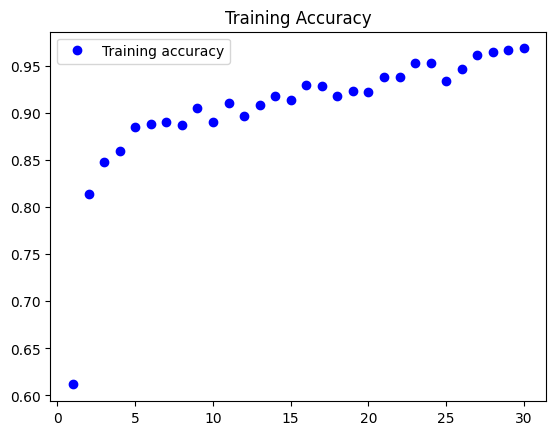

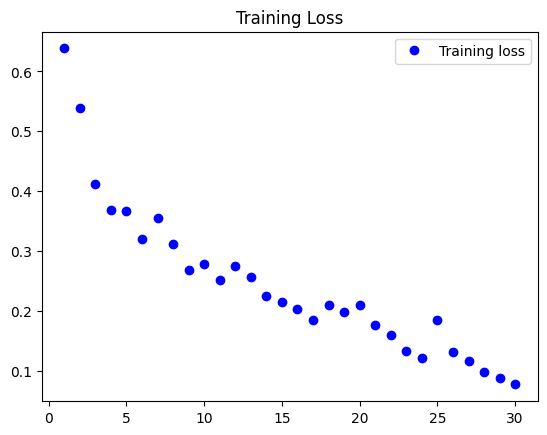

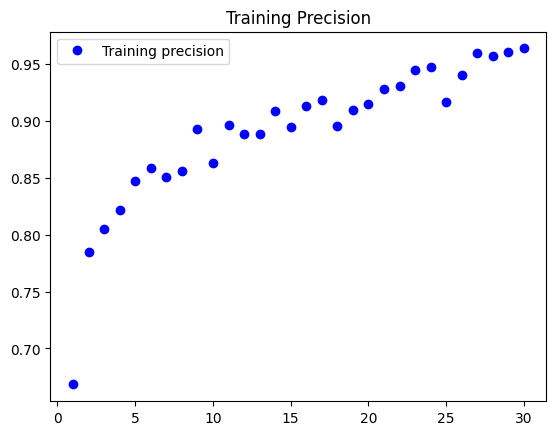

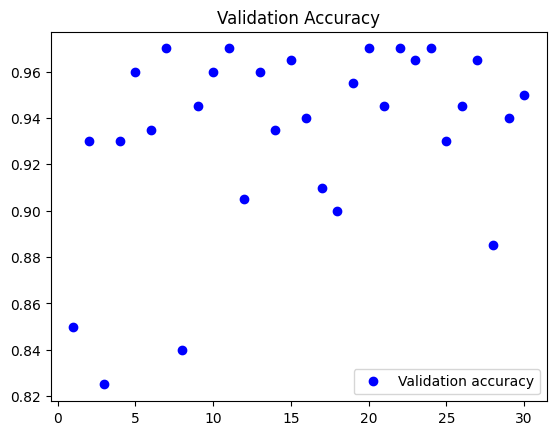

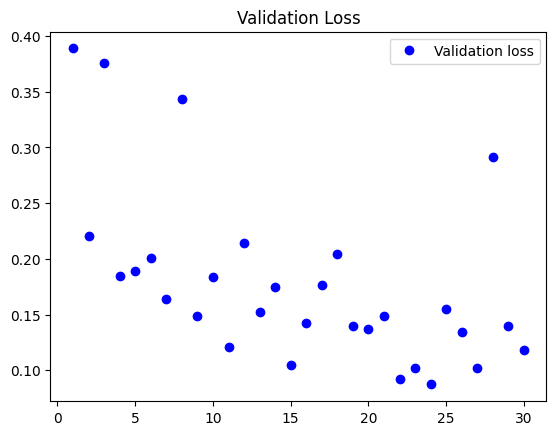

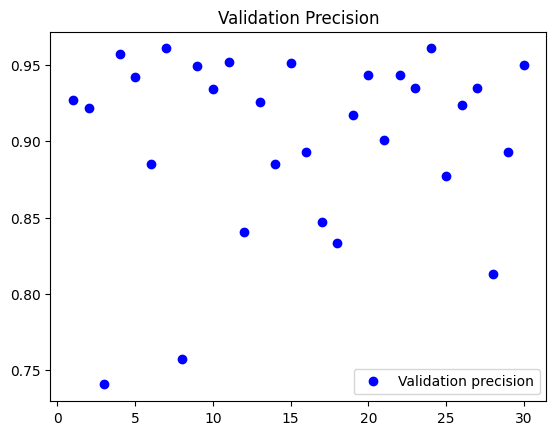

In [39]:
train_accuracy = history_decrease_layers.history["accuracy"]
train_loss = history_decrease_layers.history["loss"]
train_precision = history_decrease_layers.history["precision_6"]
val_accuracy = history_decrease_layers.history["val_accuracy"]
val_loss = history_decrease_layers.history["val_loss"]
val_precision = history_decrease_layers.history["val_precision_6"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [40]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("decrease_layers_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 15ms/step - loss: 0.1241 - accuracy: 0.9400 - precision_6: 0.9000


[0.12408556789159775, 0.9399999976158142, 0.8999999761581421]

<br></br>

**Surprisingly, decreasing one convolution and pooling layers by resulted in a training accuracy of 0.9683 and a validation accuracy of 0.95. The time it took to complete training and validation for 30 epochs was almost 3 minutes. The test performance is similar to the configuration with more layers; the accuracy with fewer layers is 0.94, while the accuracy with more layers is 0.9550.**

<br></br>
### **Increase the number of convolutional filters**

In [45]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_increased_filters = keras.Model(inputs=inputs, outputs=outputs)

In [46]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_increased_filters.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="increase_filters_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_increased_filters = model_increased_filters.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6311 - accuracy: 0.6733 - precision_9: 0.6711 - val_loss: 0.3597 - val_accuracy: 0.9000 - val_precision_9: 0.8448
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.5611 - accuracy: 0.7550 - precision_9: 0.7029 - val_loss: 0.6817 - val_accuracy: 0.5150 - val_precision_9: 0.5076
Epoch 3/30
150/150 [==============================] - 4s 26ms/step - loss: 0.6183 - accuracy: 0.7517 - precision_9: 0.6921 - val_loss: 0.4809 - val_accuracy: 0.8200 - val_precision_9: 0.7353
Epoch 4/30
150/150 [==============================] - 5s 35ms/step - loss: 0.5312 - accuracy: 0.7850 - precision_9: 0.7221 - val_loss: 0.2999 - val_accuracy: 0.9100 - val_precision_9: 0.9457
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.4459 - accuracy: 0.8367 - precision_9: 0.7953 - val_loss: 0.2461 - val_accuracy: 0.9050 - val_precision_9: 0.8403
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decrease convolution filters**

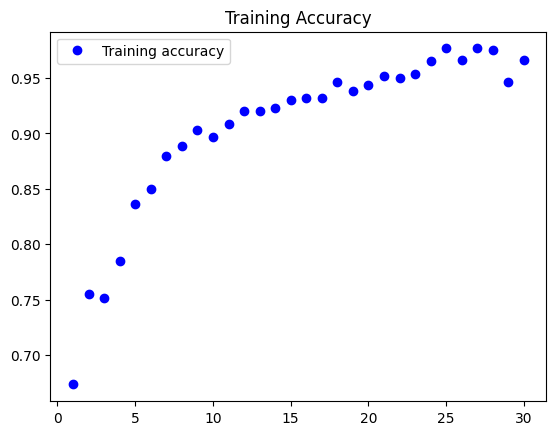

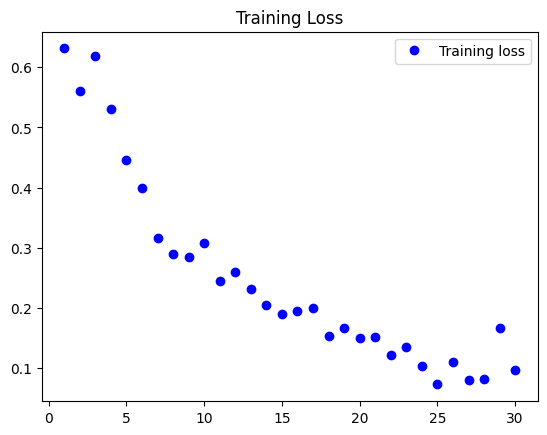

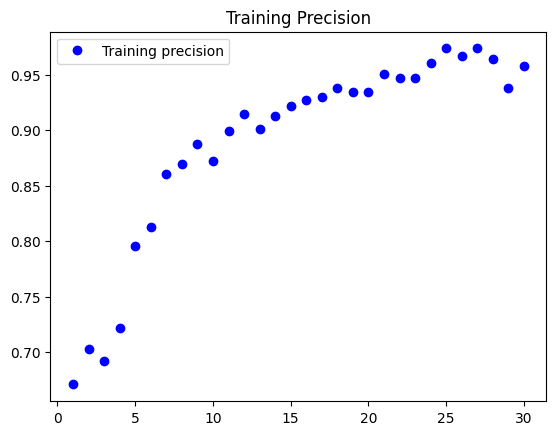

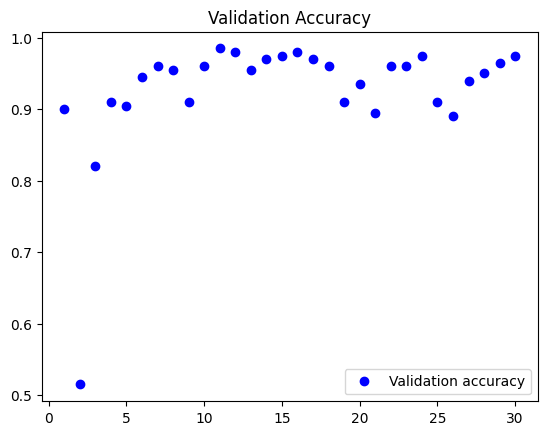

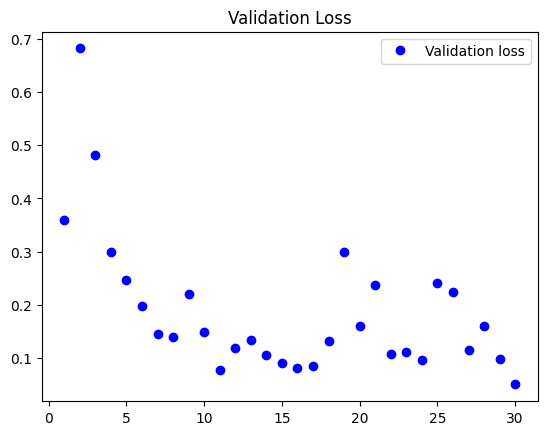

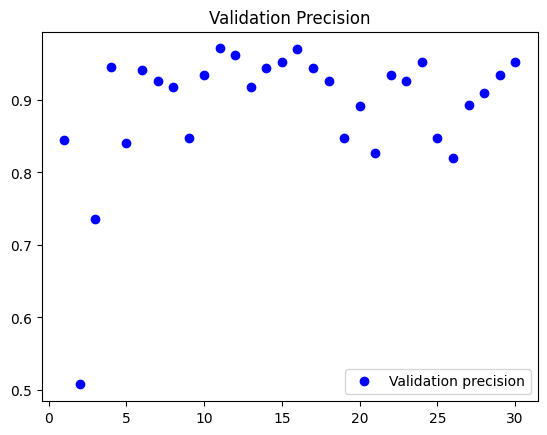

In [49]:
train_accuracy = history_increased_filters.history["accuracy"]
train_loss = history_increased_filters.history["loss"]
train_precision = history_increased_filters.history["precision_9"]
val_accuracy = history_increased_filters.history["val_accuracy"]
val_loss = history_increased_filters.history["val_loss"]
val_precision = history_increased_filters.history["val_precision_9"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [50]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("increase_filters_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 17ms/step - loss: 0.1671 - accuracy: 0.9450 - precision_9: 0.9009


[0.1671462506055832, 0.9449999928474426, 0.9009009003639221]

<br></br>

**Surprisingly, increasing the number of convolution filters from 128 to 256 in two convolution layers resulted in a training accuracy of 0.9667 and a validation accuracy of 0.9750. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is same to the configuration with more filters; the accuracy with fewer filters is 0.9450, while the accuracy with base configuration is 0.9550.**

<br></br>
### **Decrease the image size**

In [51]:
# Define the input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_decreased_image_size = keras.Model(inputs=inputs, outputs=outputs)

In [52]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_decreased_image_size.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="decrease_image_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_decreased_image_size = model_decreased_image_size.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6771 - accuracy: 0.5433 - precision_10: 0.5684 - val_loss: 0.4984 - val_accuracy: 0.8500 - val_precision_10: 0.9487
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.6645 - accuracy: 0.6917 - precision_10: 0.6448 - val_loss: 0.6203 - val_accuracy: 0.8000 - val_precision_10: 0.8947
Epoch 3/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5489 - accuracy: 0.7933 - precision_10: 0.7588 - val_loss: 0.2703 - val_accuracy: 0.9100 - val_precision_10: 0.8475
Epoch 4/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4003 - accuracy: 0.8517 - precision_10: 0.8187 - val_loss: 0.3547 - val_accuracy: 0.8450 - val_precision_10: 0.7674
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3474 - accuracy: 0.8750 - precision_10: 0.8483 - val_loss: 0.2459 - val_accuracy: 0.9100 - val_precision_10: 0.8534
Epoch 6/30
150/150 [===============

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decreased Image Size**

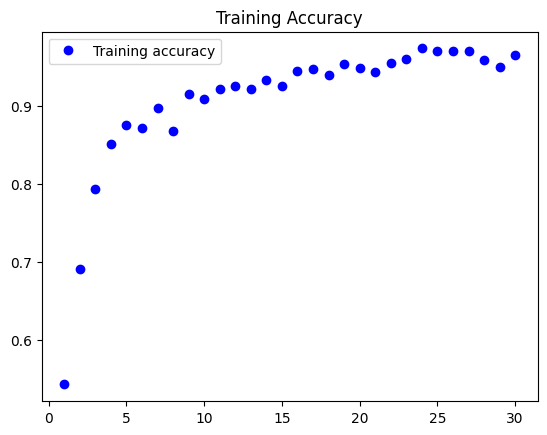

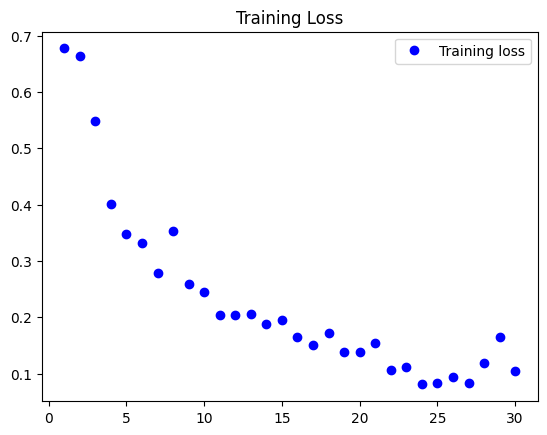

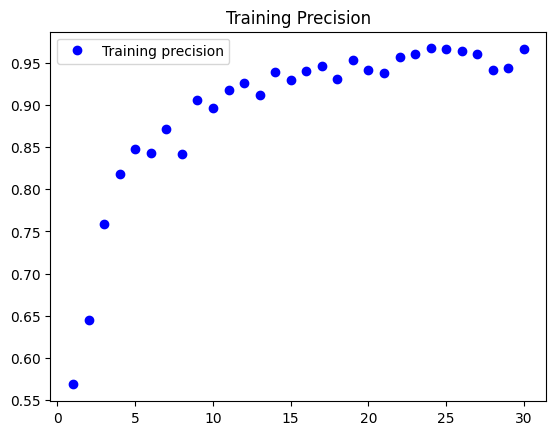

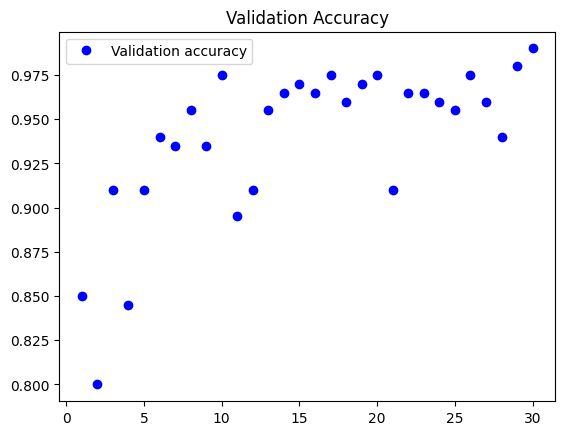

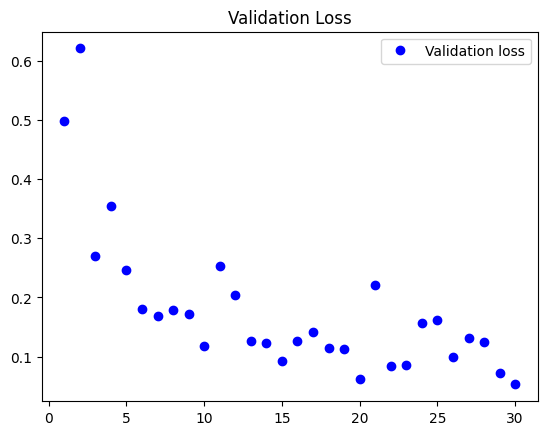

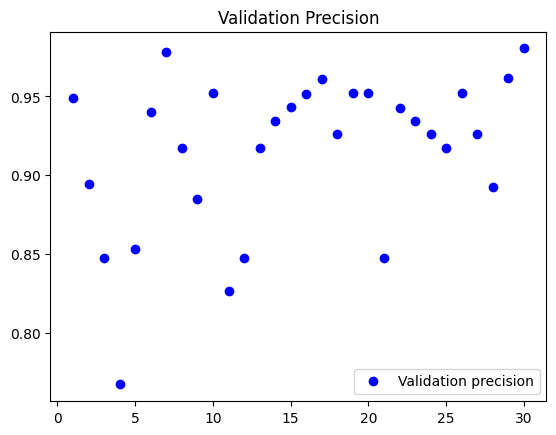

In [54]:
train_accuracy = history_decreased_image_size.history["accuracy"]
train_loss = history_decreased_image_size.history["loss"]
train_precision = history_decreased_image_size.history["precision_10"]
val_accuracy = history_decreased_image_size.history["val_accuracy"]
val_loss = history_decreased_image_size.history["val_loss"]
val_precision = history_decreased_image_size.history["val_precision_10"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [55]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("decrease_image_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1189 - accuracy: 0.9600 - precision_10: 0.9423


[0.11893752962350845, 0.9599999785423279, 0.942307710647583]

<br></br>

**Decreasing the size of input images by almost 40% resulted in a training accuracy of 0.9650 and a validation accuracy of 0.99. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is almost identical to the configuration with larger input sizes; the accuracy with the smaller image size is 0.96, while the accuracy with the larger image size is 0.9550.**

<br></br>

#### Decreasing the image size and using the base configuration model outperformed all others in the experiments. Let's load the best model and continue exploring larger network architectures..

In [56]:
# Let's load the best performing model

best_model = keras.models.load_model("decrease_image_checkpoint_filepath")

<br></br>
### **Task 6 - Exploring off-the shelf tools**

<br></br>
#### **Teachable Machines**

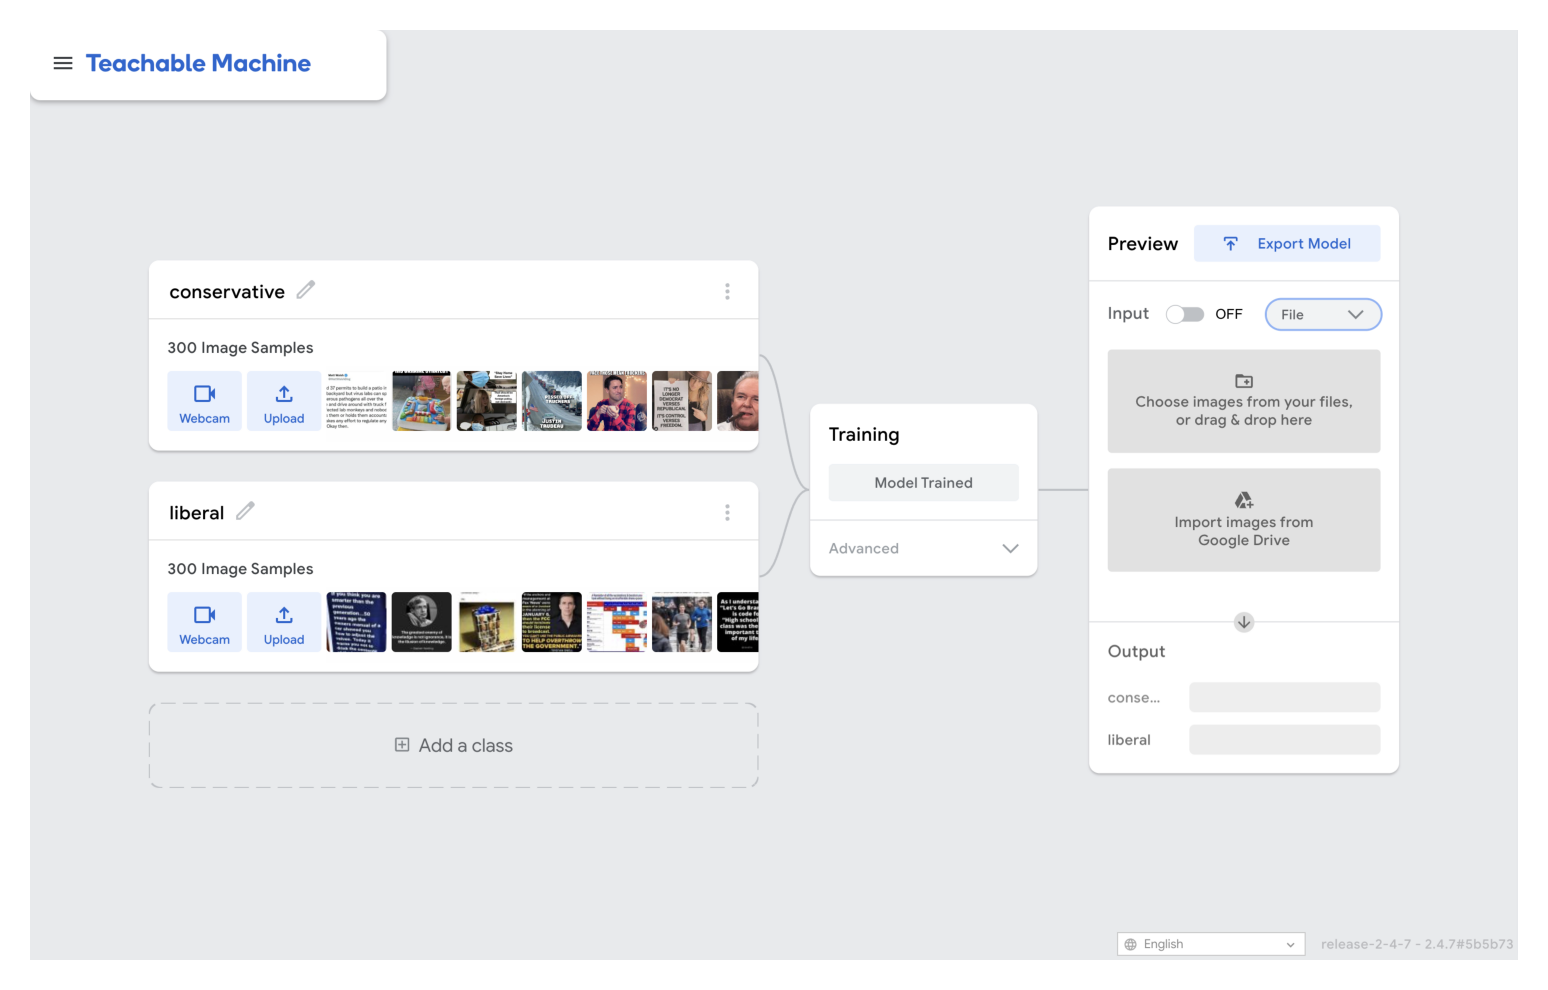

In [18]:
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread("image.png")

# Create a new figure with a high DPI
plt.figure(dpi=300)  # Increase the value for higher quality images

# Display the image
plt.imshow(img)
plt.axis("off")  # Turn off the axis

# Show the plot with a high-quality image
plt.show()

<br></br>
#### **Model Loading**

In [11]:
# Let's set up the validation data generator
# Loads images of the same size and batch size as the training generator
valid_generator = my_generator.flow_from_directory(
    f"{base_directory}/validation/",
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the test data generator
# Uses the same parameters for consistency across training, validation, and testing
test_generator = my_generator.flow_from_directory(
    f"{base_directory}/test/",
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [39]:
import numpy as np
from keras.models import load_model

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

In [56]:
def predict_and_evaluate_from_generator(generator, num_batches):
    # To hold all predictions and true labels
    all_predictions = []
    all_true_labels = []

    # Loop over the generator to collect predictions
    for _ in range(num_batches):
        images, true_labels = next(generator)
        predictions = model.predict(images, verbose=0)
        predicted_labels = np.argmax(predictions, axis=1)
        all_predictions.extend(predicted_labels)
        all_true_labels.extend(true_labels)

    # Convert all predictions and true labels to numpy arrays
    all_predictions = np.array(all_predictions)
    all_true_labels = np.array(all_true_labels)

    # Calculate accuracy and precision
    accuracy = accuracy_score(all_true_labels, all_predictions)
    # Note: Set the average type according to your classification (binary, micro, macro, weighted, etc.)
    precision = precision_score(all_true_labels, all_predictions, average='binary')  # Adjust average as necessary

    # Print accuracy and precision
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")

<br></br>
#### **Validation Accuracy**

In [57]:
num_batches = 5  # Define how many batches you want to use for evaluation
print("Evaluation on validation data:")
predict_and_evaluate_from_generator(valid_generator, num_batches)

Evaluation on validation data:
Accuracy: 0.7
Precision: 0.75


<br></br>
#### **Test Accuracy**

In [59]:
num_batches = 5  # Define how many batches you want to use for evaluation
print("Evaluation on test data:")
predict_and_evaluate_from_generator(test_generator, num_batches)

Evaluation on test data:
Accuracy: 0.7
Precision: 1.0


<br></br>
Using the Teachable Machines browser tool to fine-tune a political meme dataset resulted in a validation accuracy of 0.7. The test performance decreased compared to the base configuration; the accuracy with the Teachable Machines architecture was 0.7, while the accuracy with the base configuration was 0.9550.

<br></br>
#### **Challenges in using Teachable Machines**

1. Increasing the number of epochs frequently causes the web page to become unresponsive, necessitating repeated reloads of the website and re-uploads of images, which complicates the entire process.

2. After exporting the model and loading it using Keras to validate the validation and test accuracy, the accuracy changes every time I run the code. Typically, after training and loading a model, the validation and test accuracy should not vary.

<br></br>
### **ChatGPT**

In [89]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2  # for binary classification

# Start defining the model using the Functional API
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling serves as a way to reduce spatial dimensions to a single vector per feature map
x = layers.GlobalAveragePooling2D()(x)

# Output layer for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize and create the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_47 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 37, 37, 128)       7385

In [90]:
cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's train and validate model on the training and validation data
history = model.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_early])


Epoch 1/30
150/150 [==============================] - 6s 27ms/step - loss: 0.6710 - accuracy: 0.6050 - precision_5: 0.6567 - val_loss: 0.4793 - val_accuracy: 0.7900 - val_precision_5: 0.9265
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.6210 - accuracy: 0.7050 - precision_5: 0.6519 - val_loss: 0.4338 - val_accuracy: 0.9050 - val_precision_5: 0.8584
Epoch 3/30
150/150 [==============================] - 4s 26ms/step - loss: 0.4390 - accuracy: 0.8317 - precision_5: 0.7901 - val_loss: 0.5119 - val_accuracy: 0.7500 - val_precision_5: 0.6667
Epoch 4/30
150/150 [==============================] - 4s 25ms/step - loss: 0.3521 - accuracy: 0.8533 - precision_5: 0.8313 - val_loss: 0.2643 - val_accuracy: 0.8900 - val_precision_5: 0.8197
Epoch 5/30
150/150 [==============================] - 4s 25ms/step - loss: 0.3031 - accuracy: 0.8833 - precision_5: 0.8639 - val_loss: 0.3662 - val_accuracy: 0.8350 - val_precision_5: 0.7519
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - ChatGPT**

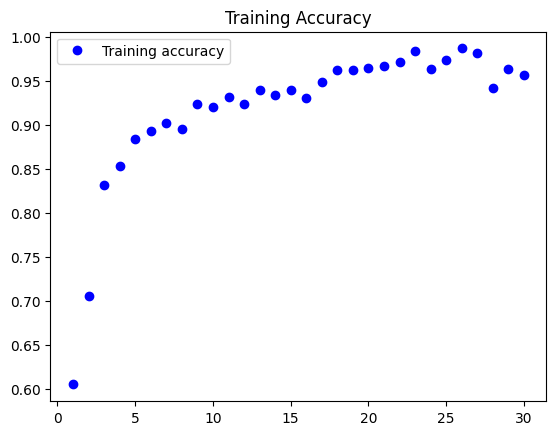

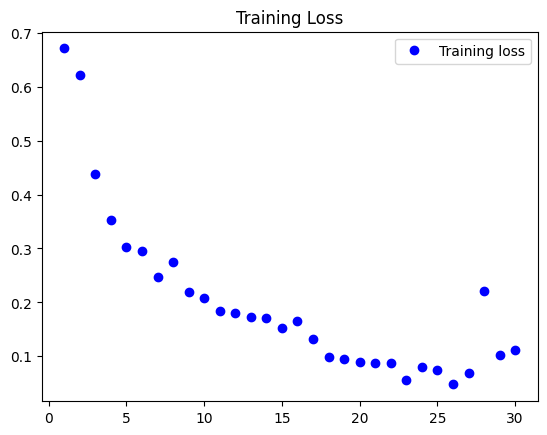

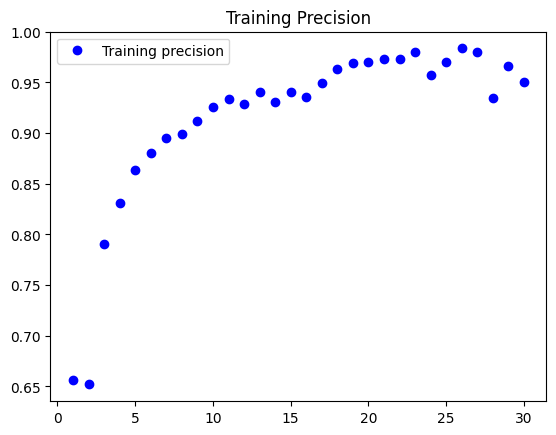

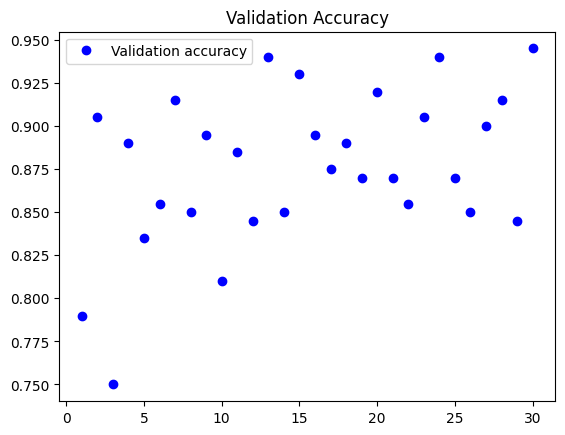

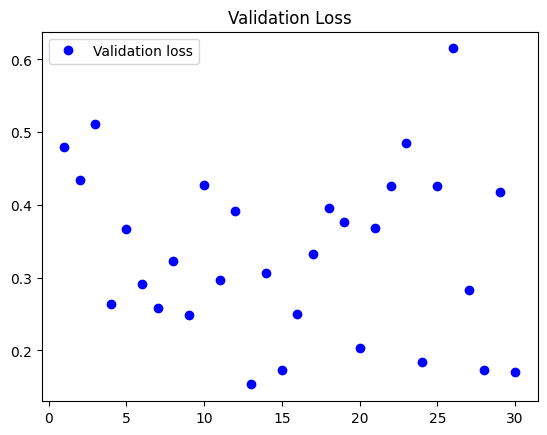

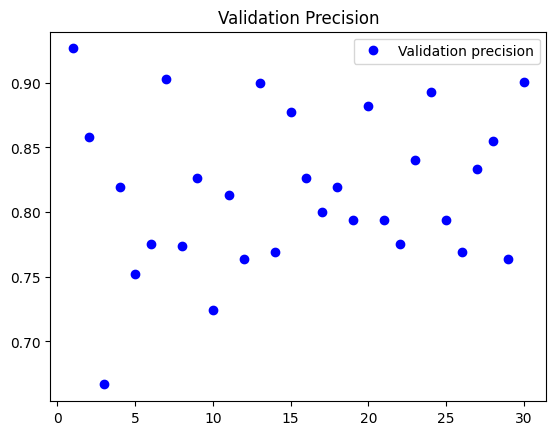

In [92]:
train_accuracy = history.history["accuracy"]
train_loss = history.history["loss"]
train_precision = history.history["precision_5"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
val_precision = history.history["val_precision_5"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [93]:
# Let's test the model
model.evaluate(test_generator)

50/50 [==============================] - 1s 17ms/step - loss: 0.3606 - accuracy: 0.9050 - precision_5: 0.8403


[0.36062026023864746, 0.9049999713897705, 0.8403361439704895]

<br></br>
Using the code provided by ChatGPT to build, compile, and fine-tune a political meme dataset resulted in a validation accuracy of 0.9450. The test performance was almost similar to the base configuration; the accuracy with the ChatGPT architecture was 0.91, while the accuracy with the base configuration was 0.9550.

<br></br>
#### **Challenges in using ChatGPT**

1. Using ChatGPT to train and validate a political images dataset resulted in code that had several issues, particularly with the incorrect number of neurons in the dense layer, leading to repeated graph execution errors. Despite multiple attempts to resolve the issue through ChatGPT, the problem persisted, and I ultimately had to fix it myself.

2. After resolving all the issues for training, the validation accuracy fluctuated randomly. When asked, ChatGPT produced different versions of code that did not make any sense. Furthermore, the explanations it provided for the fluctuations were not logical.

<br></br>
### **Gemini**

In [100]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define the model architecture
model_gemini = Sequential()
model_gemini.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))  # Update input shape
model_gemini.add(MaxPooling2D((2, 2)))
model_gemini.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_gemini.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
model_gemini.add(layers.GlobalAveragePooling2D())
model_gemini.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_gemini.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_gemini.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision()])

# Train the model
history_gemini = model_gemini.fit(train_generator, epochs=30, validation_data=valid_generator)


Epoch 1/30
150/150 [==============================] - 5s 27ms/step - loss: 0.6630 - accuracy: 0.5733 - precision_8: 0.6134 - val_loss: 0.5693 - val_accuracy: 0.7100 - val_precision_8: 0.6750
Epoch 2/30
150/150 [==============================] - 4s 26ms/step - loss: 0.5577 - accuracy: 0.7150 - precision_8: 0.7416 - val_loss: 0.4817 - val_accuracy: 0.8150 - val_precision_8: 0.7890
Epoch 3/30
150/150 [==============================] - 4s 26ms/step - loss: 0.4771 - accuracy: 0.7900 - precision_8: 0.7939 - val_loss: 0.3996 - val_accuracy: 0.8400 - val_precision_8: 0.7881
Epoch 4/30
150/150 [==============================] - 4s 25ms/step - loss: 0.3992 - accuracy: 0.8250 - precision_8: 0.8095 - val_loss: 0.3371 - val_accuracy: 0.8700 - val_precision_8: 0.7984
Epoch 5/30
150/150 [==============================] - 4s 25ms/step - loss: 0.3558 - accuracy: 0.8483 - precision_8: 0.8276 - val_loss: 0.4387 - val_accuracy: 0.7750 - val_precision_8: 0.6897
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Gemini**

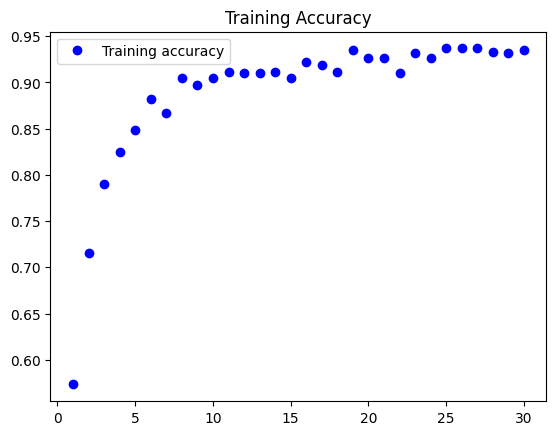

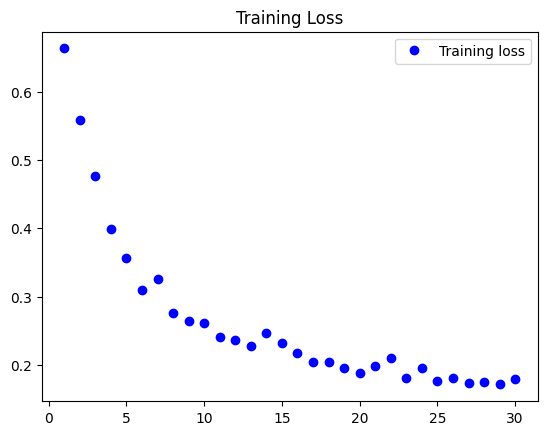

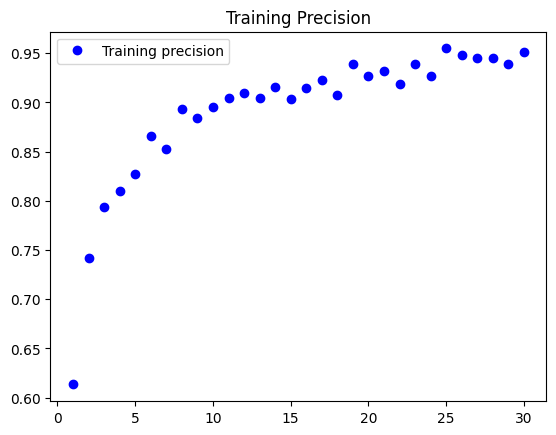

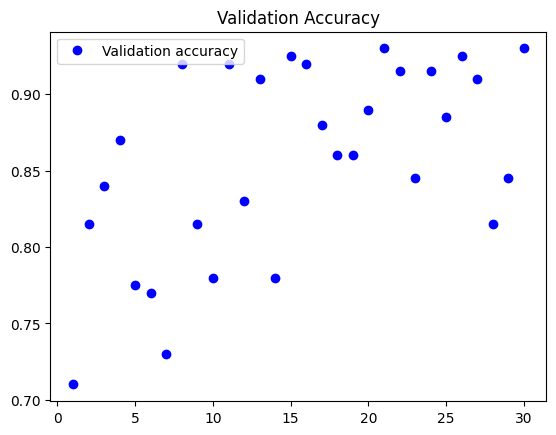

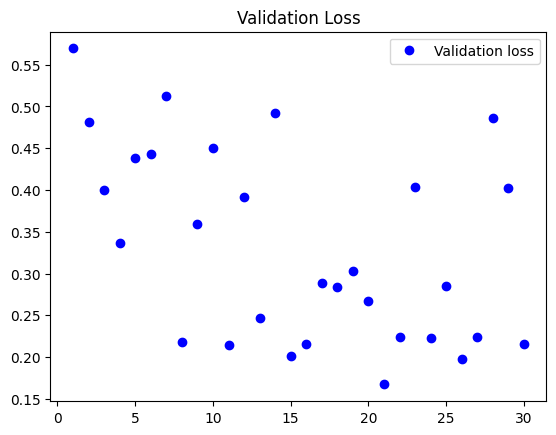

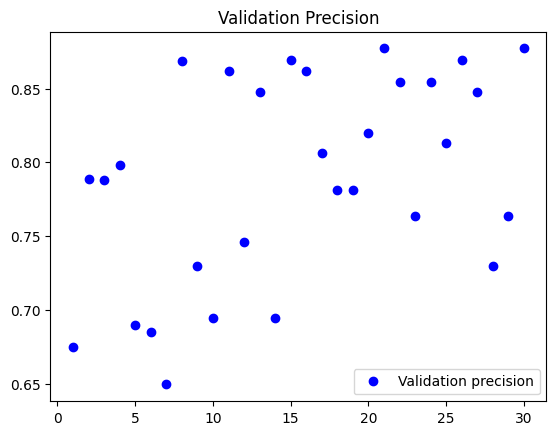

In [106]:
train_accuracy = history_gemini.history["accuracy"]
train_loss = history_gemini.history["loss"]
train_precision = history_gemini.history["precision_8"]
val_accuracy = history_gemini.history["val_accuracy"]
val_loss = history_gemini.history["val_loss"]
val_precision = history_gemini.history["val_precision_8"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [107]:
# Let's test the model
model_gemini.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.3590 - accuracy: 0.8750 - precision_8: 0.8000


[0.3590352535247803, 0.875, 0.800000011920929]

<br></br>
Using the code provided by Gemini to build, compile, and fine-tune a political meme dataset resulted in a validation accuracy of 0.93. The test performance was almost similar to the base configuration; the accuracy with the Gemini architecture was 0.88, while the accuracy with the base configuration was 0.9550.

<br></br>
#### **Challenges in using Gemini**

1. Using Gemini to train and validate a political images dataset resulted in code that had several issues, particularly with the incorrect number of neurons in the dense layer, leading to repeated graph execution errors. Despite multiple attempts to resolve the issue through Gemini, the problem persisted, and I ultimately had to fix it myself.

2. After resolving all the issues for training, the validation accuracy fluctuated randomly. When asked, Gemini produced different versions of code that did not make any sense. Furthermore, the explanations it provided for the fluctuations were not logical.

<br></br>

#### Comparison of Different Off Shelf Tools on Model Performance



| Tool              | Validation Accuracy | Test Accuracy |
|-------------------|---------------------|---------------|
| Teachable Machines| 0.7                 | 0.7           |
| ChatGPT           | 0.9450              | 0.91          |
| Gemini            | 0.93                | 0.88          |
